In [2]:
# Numerical libraries
import numpy as np   

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#sklearn has lot of supervised learning algortihms but we are considering only lineardiscriminant analysis here 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split,GridSearchCV

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Problem 1: Linear Regression

In [3]:
p1=pd.read_csv("cubic_zirconia.csv")

In [3]:
p1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
p1.shape

(26967, 11)

In [5]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
p1.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [7]:
p1.rename(columns={ p1.columns[0]: "SN" }, inplace = True)

In [8]:
p1=p1.drop("SN",axis=1)
p1

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [9]:
p1.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [10]:
p1[p1["depth"].isna()]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


## one hot endcoding

In [11]:
p1["cut"].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

In [12]:
# Replace the values in categorical variables to ensure values are in alphabetical order
p1['cut'] = p1['cut'].replace({"Premium": 'Y', "Ideal": 'Z'})

In [13]:
p1["cut"].value_counts()

Z            10816
Y             6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

In [14]:
p1["color"].value_counts() #D being the best and J is the worst

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

In [15]:
p1['color'] = p1['color'].replace({"D": 6, "E": 5, "F":4,"G":3,"H":2,"I":1,"J":0})

In [16]:
p1["color"].value_counts()

3    5661
5    4917
4    4729
2    4102
6    3344
1    2771
0    1443
Name: color, dtype: int64

In [17]:
p1["clarity"].value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

In [18]:
p1['clarity'] = p1['clarity'].replace({"FL":10, "IF":9, "VVS1":8, "VVS2":7, "VS1":6, "VS2":5, "SI1":4, "SI2":3, "I1":2, "I2":1, "I3":0})

In [19]:
p1["clarity"].value_counts()

4    6571
5    6099
3    4575
6    4093
7    2531
8    1839
9     894
2     365
Name: clarity, dtype: int64

In [20]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'cut'. 
p1['cut']= label_encoder.fit_transform(p1['cut']) 
p1['cut'].value_counts()

4    10816
3     6899
2     6030
1     2441
0      781
Name: cut, dtype: int64

In [21]:
p1.info() #All columns are now numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int32  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int32(1), int64(3)
memory usage: 2.0 MB


In [22]:
p1.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,2.909556,3.393889,5.053102,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.113229,1.705992,1.647042,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,0.000000,0.000000,2.000000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,2.000000,4.000000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,3.000000,3.000000,5.000000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,4.000000,5.000000,6.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,4.000000,6.000000,9.000000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [23]:
p1.mean()

carat         0.798375
cut           2.909556
color         3.393889
clarity       5.053102
depth        61.745147
table        57.456080
x             5.729854
y             5.733569
z             3.538057
price      3939.518115
dtype: float64

In [24]:
p1.max()-p1.min()

carat          4.30
cut            4.00
color          6.00
clarity        7.00
depth         22.80
table         30.00
x             10.23
y             58.90
z             31.80
price      18492.00
dtype: float64

In [25]:
dups = p1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [26]:
print('Before',p1.shape)
p1.drop_duplicates(inplace=True) 
print('After',p1.shape)

Before (26967, 10)
After (26933, 10)


## univariate analysis

Text(0.5, 1.0, 'Price')

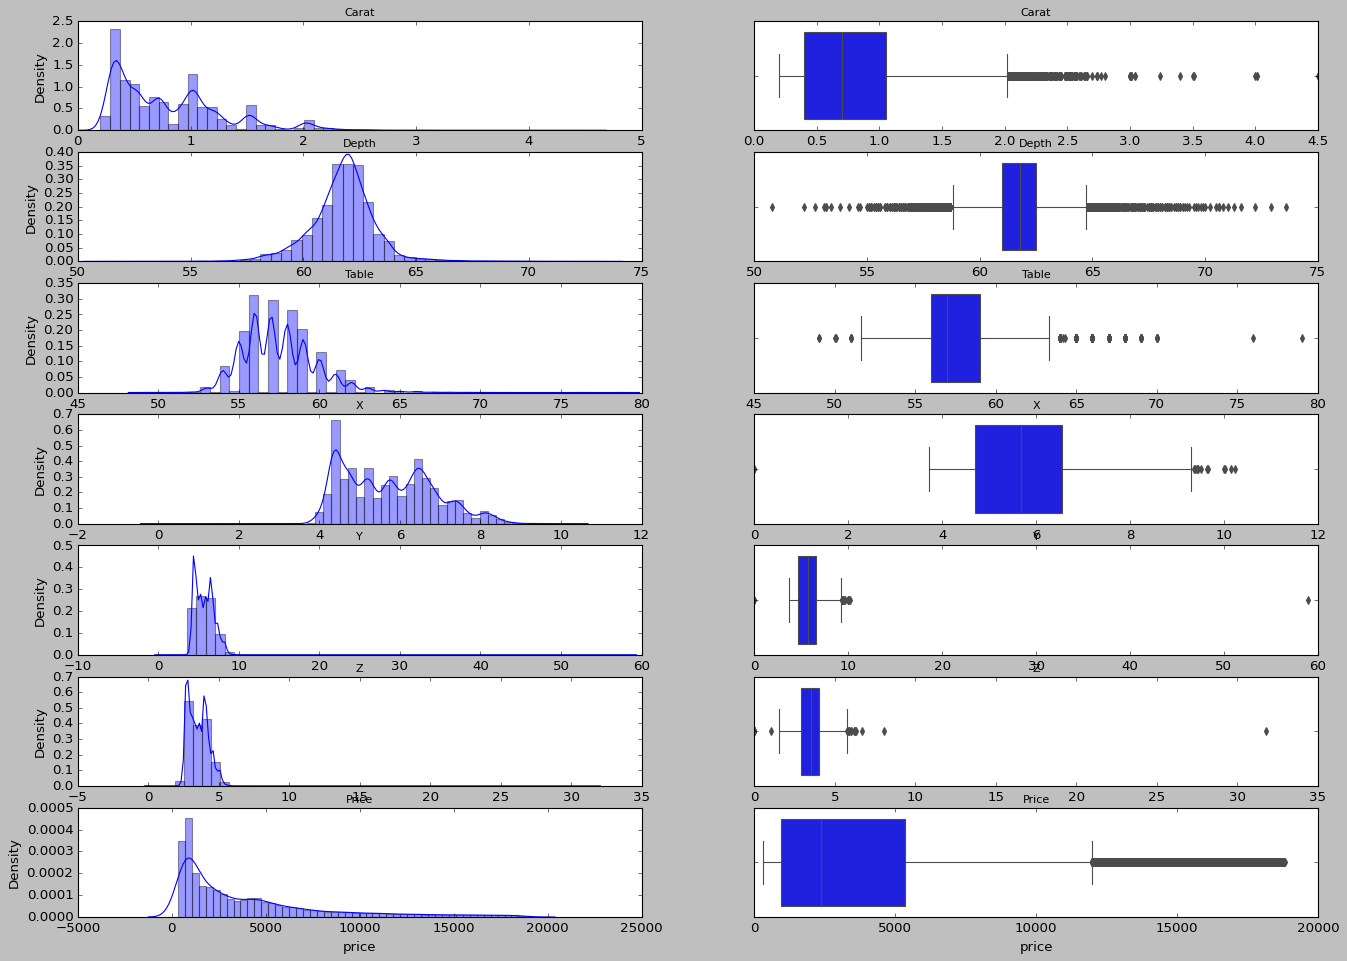

In [27]:



fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(20, 14)

a = sns.distplot(p1['carat'] , ax=axes[0][0])
a.set_title("Carat",fontsize=10)
a = sns.boxplot(p1['carat'] , orient='v', ax=axes[0][1])
a.set_title("Carat",fontsize=10)

a = sns.distplot(p1['depth'] , ax=axes[1][0])
a.set_title("Depth",fontsize=10)
a = sns.boxplot(p1['depth'] , orient='v', ax=axes[1][1])
a.set_title("Depth",fontsize=10)

a = sns.distplot(p1['table'] , ax=axes[2][0])
a.set_title("Table",fontsize=10)
a = sns.boxplot(p1['table'] , orient='v', ax=axes[2][1])
a.set_title("Table",fontsize=10)

a = sns.distplot(p1['x'] , ax=axes[3][0])
a.set_title("X",fontsize=10)
a = sns.boxplot(p1['x'] , orient='v', ax=axes[3][1])
a.set_title("X",fontsize=10)

a = sns.distplot(p1['y'] , ax=axes[4][0])
a.set_title("Y",fontsize=10)
a = sns.boxplot(p1['y'] , orient='v', ax=axes[4][1])
a.set_title("Y",fontsize=10)

a = sns.distplot(p1['z'] , ax=axes[5][0])
a.set_title("Z",fontsize=10)
a = sns.boxplot(p1['z'] , orient='v', ax=axes[5][1])
a.set_title("Z",fontsize=10)

a = sns.distplot(p1['price'] , ax=axes[6][0])
a.set_title("Price",fontsize=10)
a = sns.boxplot(p1['price'] , orient='v', ax=axes[6][1])
a.set_title("Price",fontsize=10)

Text(0.5, 1.0, 'Clarity')

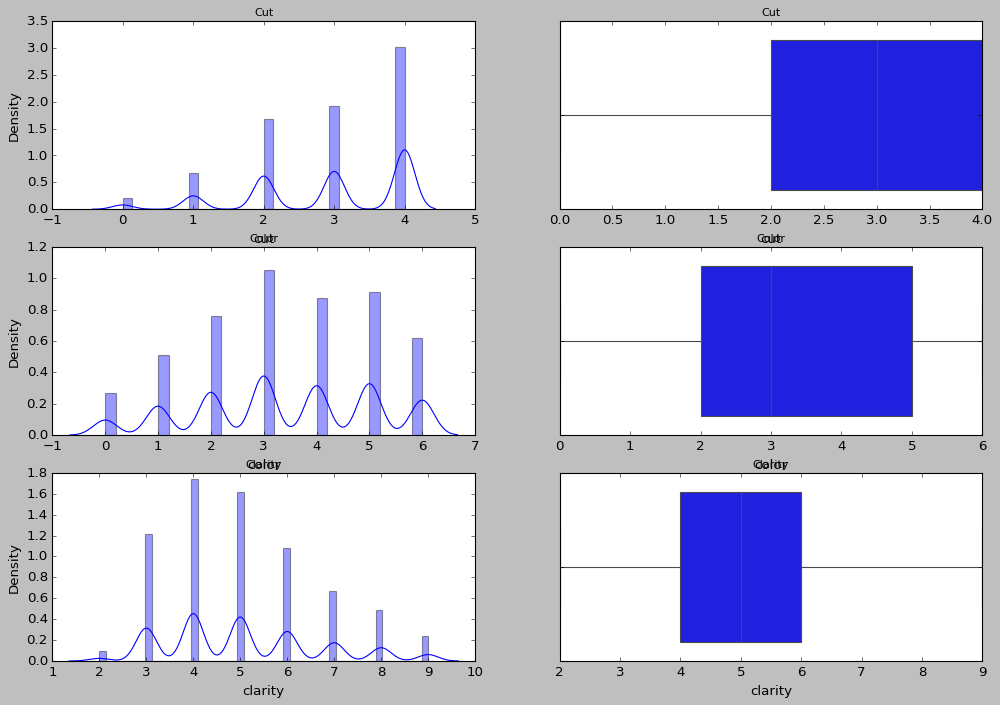

In [28]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 10)

a = sns.distplot(p1['cut'] , ax=axes[0][0])
a.set_title("Cut",fontsize=10)
a = sns.boxplot(p1['cut'] , orient='v', ax=axes[0][1])
a.set_title("Cut",fontsize=10)

a = sns.distplot(p1['color'] , ax=axes[1][0])
a.set_title("Color",fontsize=10)
a = sns.boxplot(p1['color'] , orient='v', ax=axes[1][1])
a.set_title("Color",fontsize=10)

a = sns.distplot(p1['clarity'] , ax=axes[2][0])
a.set_title("Clarity",fontsize=10)
a = sns.boxplot(p1['clarity'] , orient='v', ax=axes[2][1])
a.set_title("Clarity",fontsize=10)

In [29]:
p1.skew()

carat      1.114789
cut       -0.718829
color     -0.189386
clarity    0.551775
depth     -0.026086
table      0.765805
x          0.392290
y          3.867764
z          2.580665
price      1.619116
dtype: float64

## bivariate and mulitvariate analysis

<Figure size 800x400 with 0 Axes>

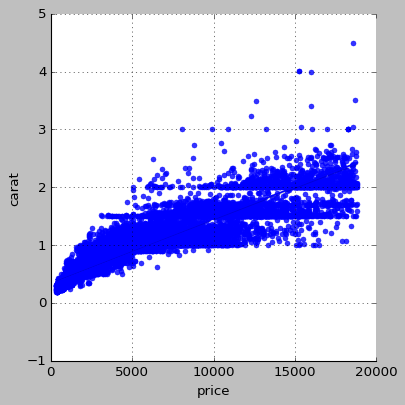

<Figure size 800x400 with 0 Axes>

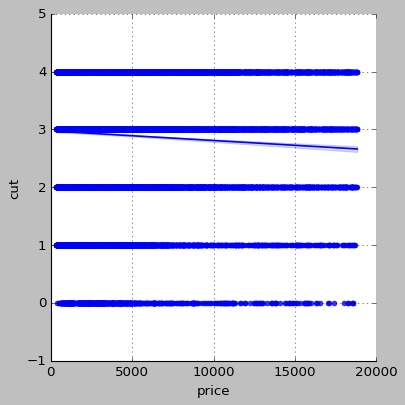

<Figure size 800x400 with 0 Axes>

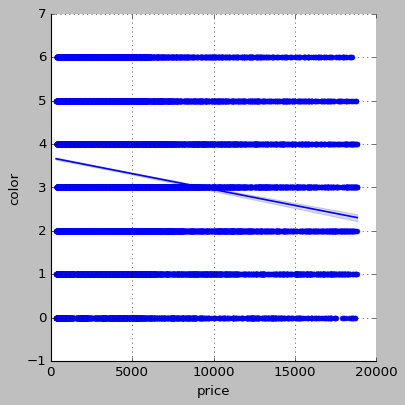

<Figure size 800x400 with 0 Axes>

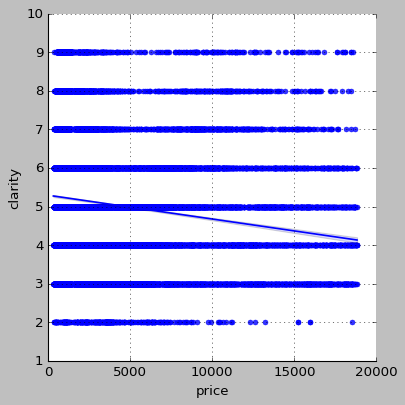

<Figure size 800x400 with 0 Axes>

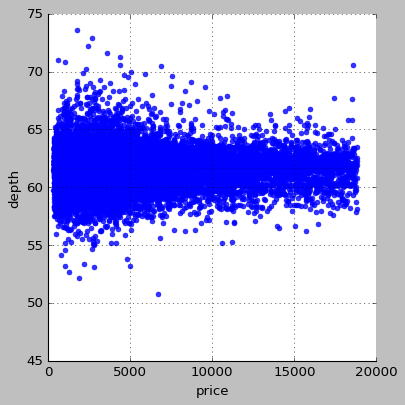

<Figure size 800x400 with 0 Axes>

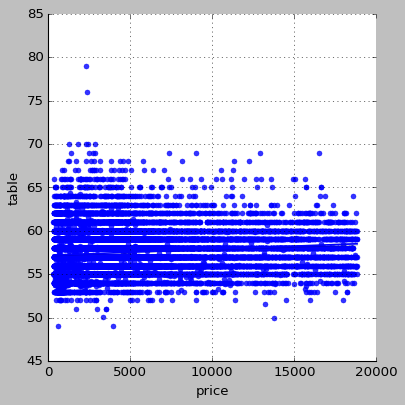

<Figure size 800x400 with 0 Axes>

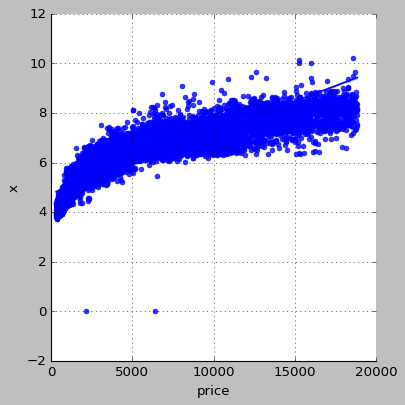

<Figure size 800x400 with 0 Axes>

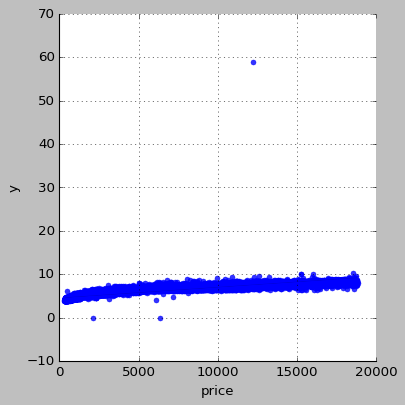

<Figure size 800x400 with 0 Axes>

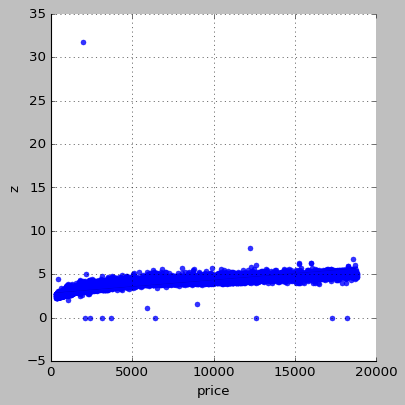

<Figure size 800x400 with 0 Axes>

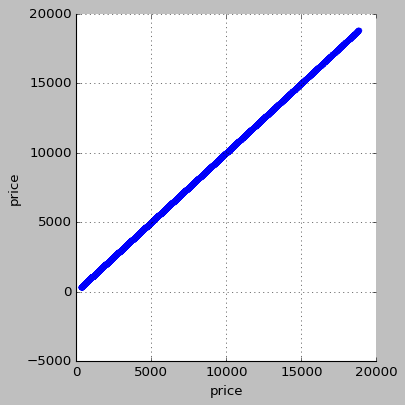

In [30]:

y=p1.columns
for cols in y:
    plt.figure(figsize=(10,5))
    a =sns.lmplot(y=cols, x="price", data=p1);
    plt.grid()
    plt.show()


Text(0.5, 1.0, 'CLARITY')

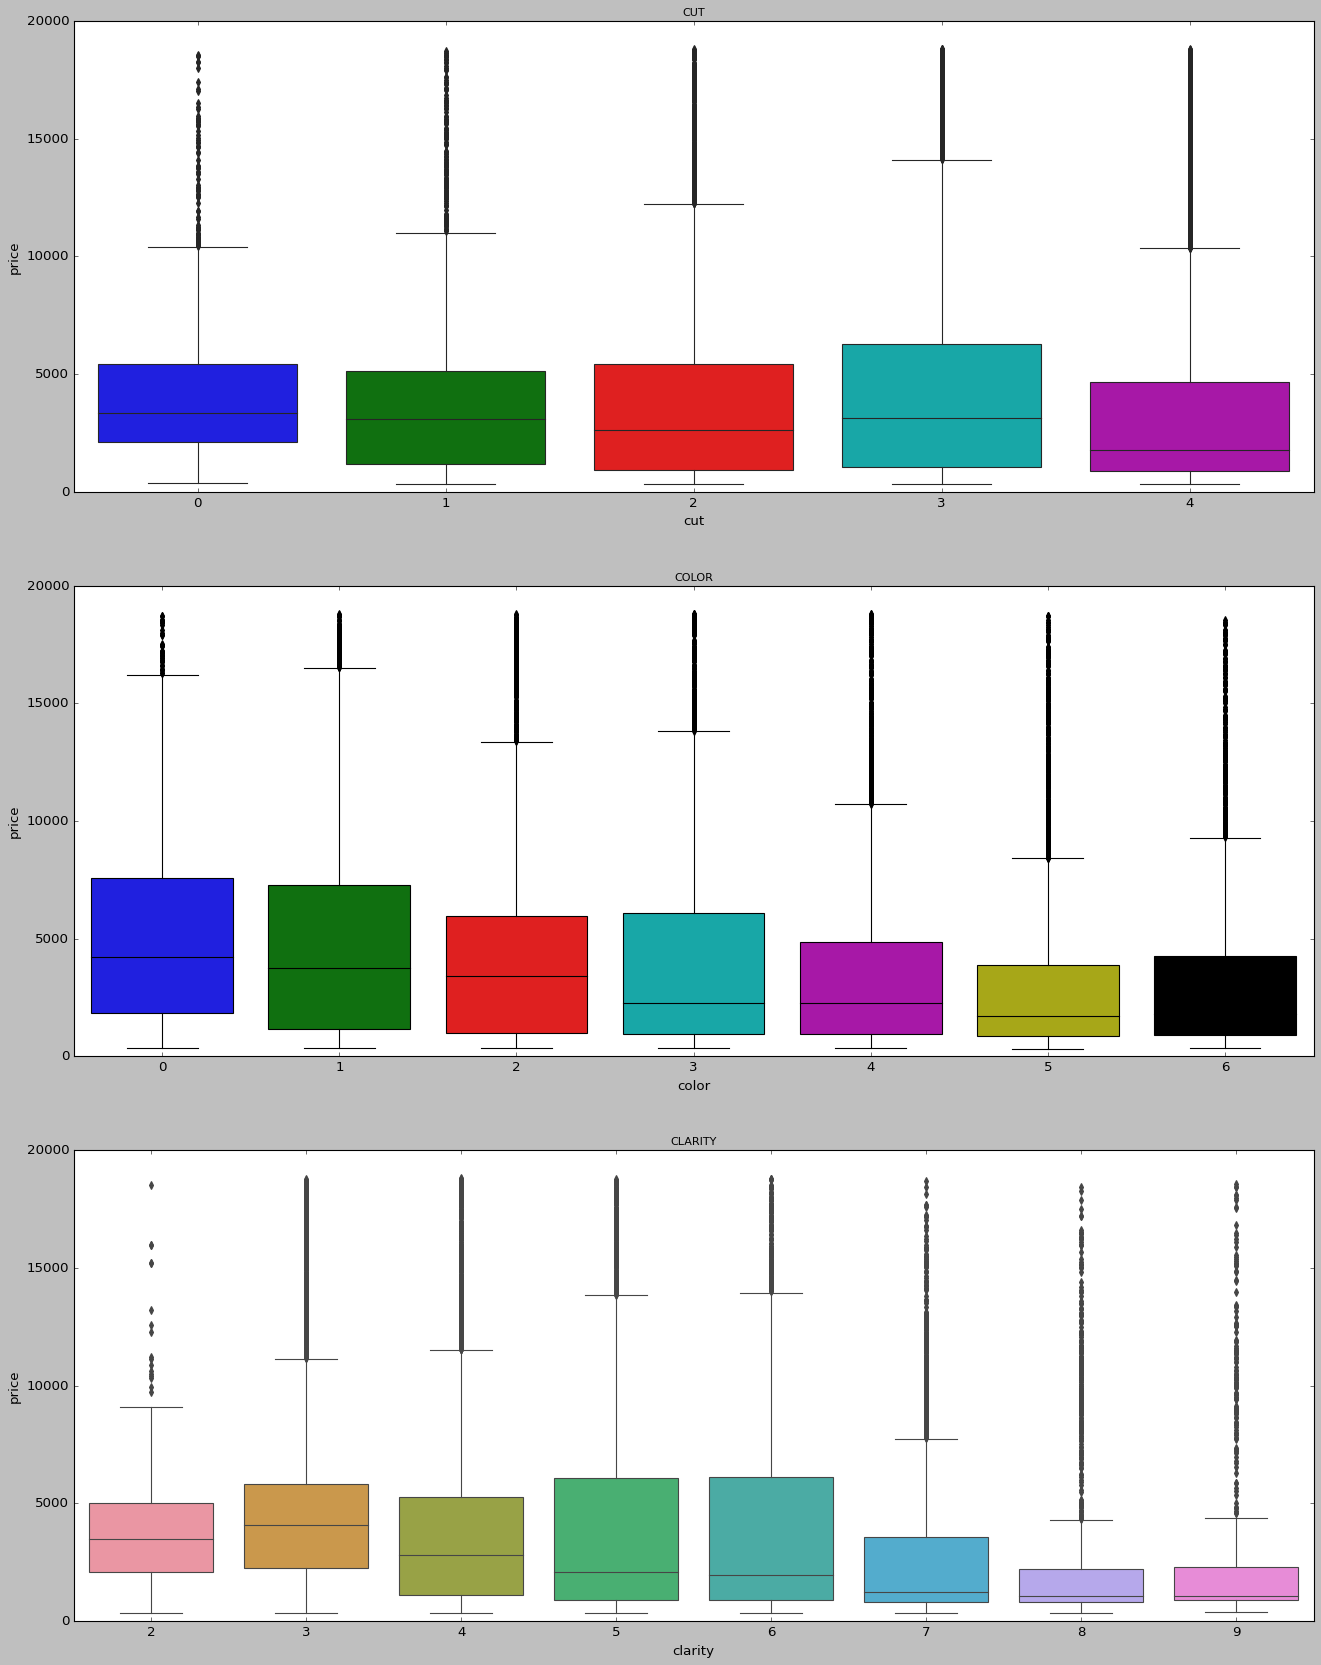

In [32]:
fig, axes = plt.subplots(nrows=3)
fig.set_size_inches(20, 25)

a = sns.boxplot(p1['cut'], p1['price'], ax=axes[0]);
a.set_title("CUT",fontsize=10)

a = sns.boxplot(p1['color'], p1['price'], ax=axes[1]);
a.set_title("COLOR",fontsize=10)

a = sns.boxplot(p1['clarity'], p1['price'], ax=axes[2]);
a.set_title("CLARITY",fontsize=10)

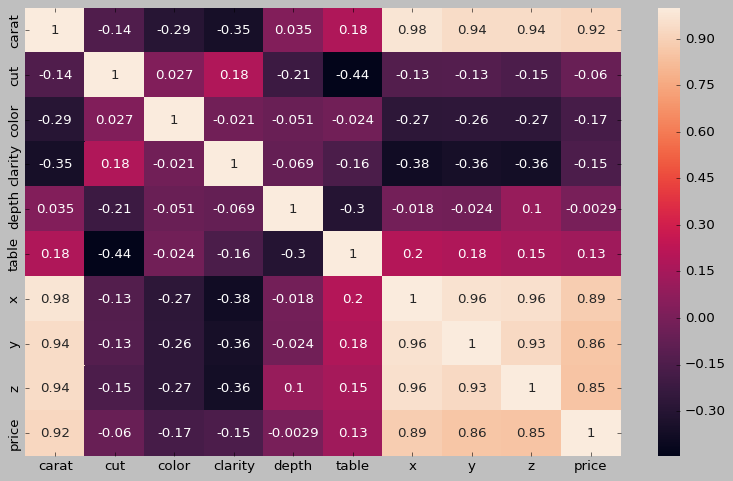

In [34]:
plt.figure(figsize=(12,7))
sns.heatmap(p1.corr(), annot=True);

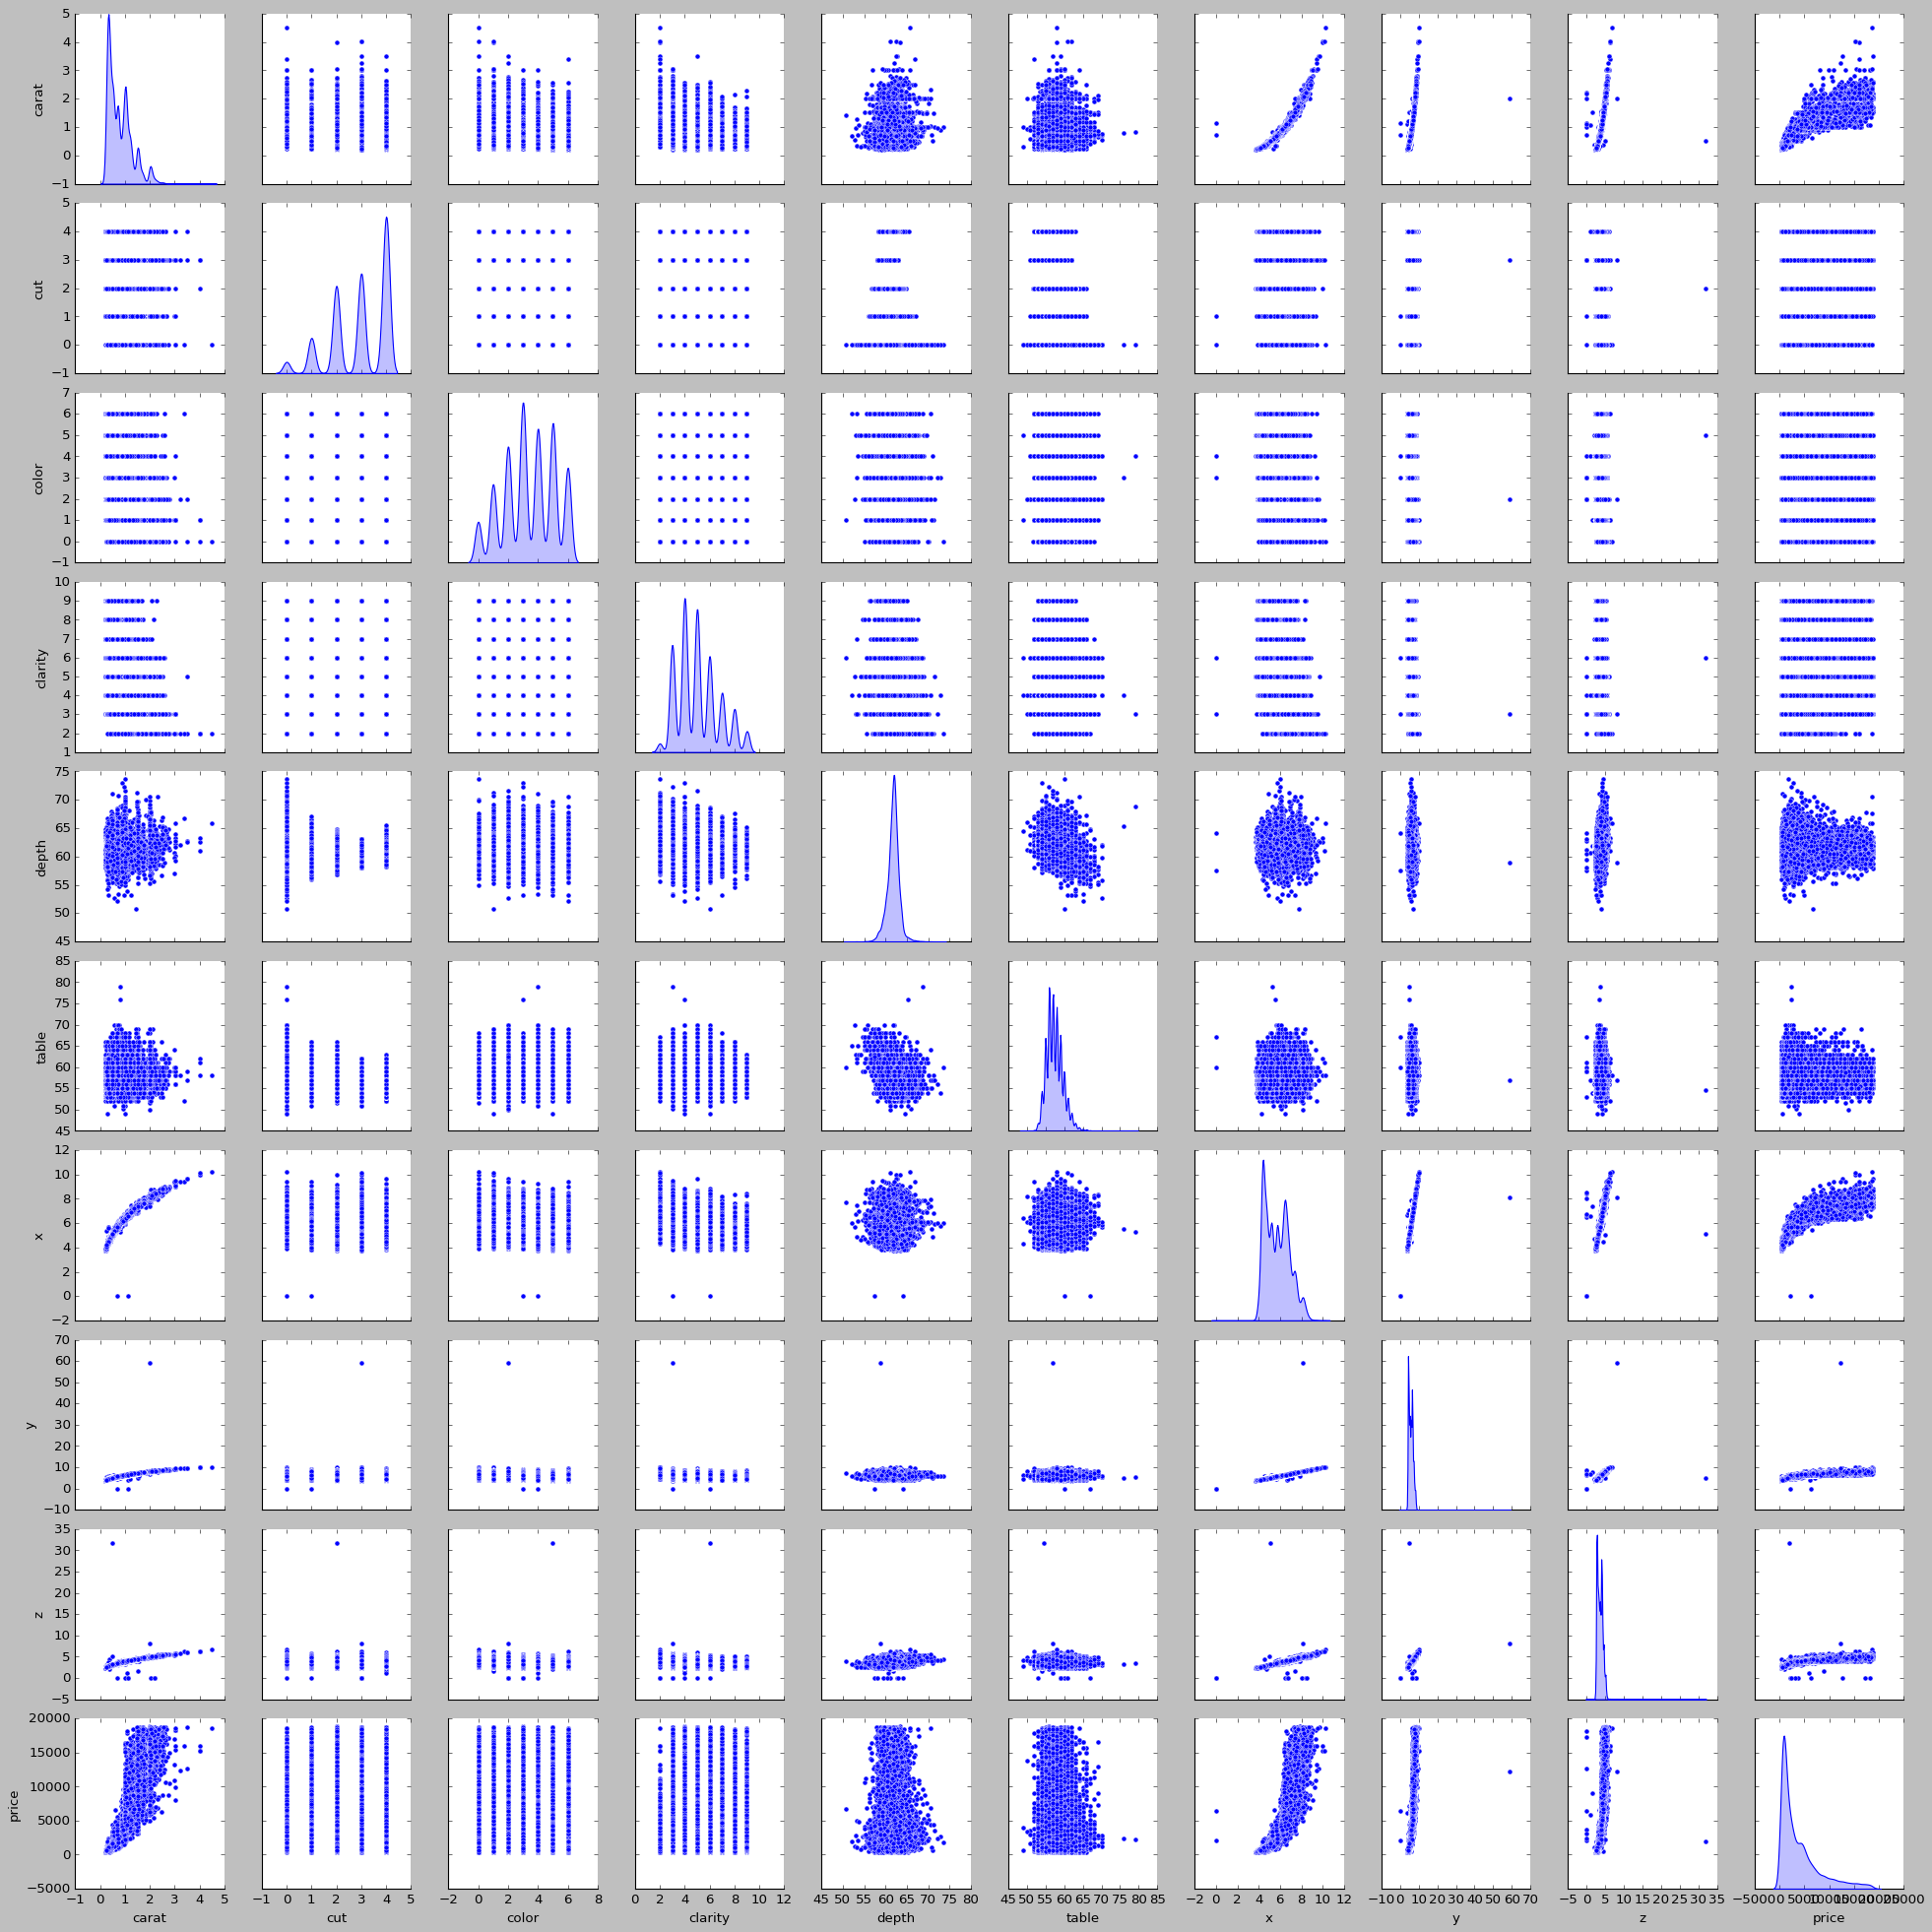

In [35]:
sns.pairplot(p1, diag_kind='kde')  
plt.show()

## Missing value imputation

In [36]:
p1["depth"].isnull().sum()

697

In [37]:
p1[p1["depth"].isna()]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,4,6,4,NaN,57.0,4.50,4.44,2.74,803
86,0.74,4,5,3,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,3,4,4,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,3,5,3,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,2,4,5,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,2,2,6,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,3,1,5,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,2,5,4,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,4,6,5,NaN,57.0,5.12,5.09,3.18,1882


In [38]:
p1["depth"].describe()

count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

In [39]:
# Depth columns missing value is replaced with that columns median
p1["depth"] = p1["depth"].fillna(p1["depth"].median())

In [40]:
p1.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [41]:
p1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,5,4,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,9,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,5,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,4,6,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,4,8,60.4,59.0,4.35,4.43,2.65,779


In [42]:
p2=p1

## Feature Engineering

In [43]:
p1["ratio"]=(p1['x']*p1["y"]*p1["z"])

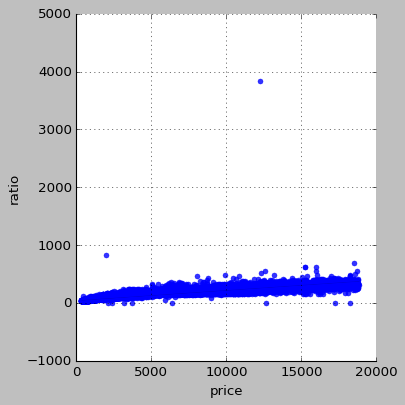

In [44]:
sns.lmplot(y="ratio", x="price", data=p1);
plt.grid()
plt.show()

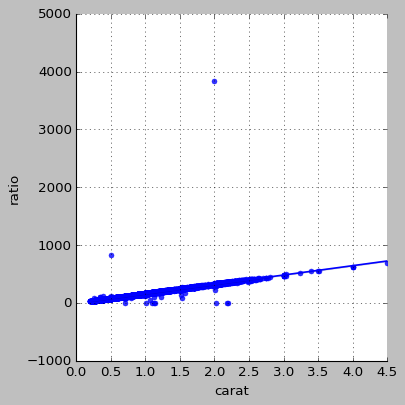

In [45]:
sns.lmplot(y="ratio", x="carat", data=p1);
plt.grid()
plt.show()

In [46]:
p1=p1.drop("x",axis=1)


In [47]:
p1=p1.drop("y",axis=1)


In [48]:
p1=p1.drop("z",axis=1)
p1.head()

,carat,cut,color,clarity,depth,table,price,ratio
0,0.30,4,5,4,62.1,58.0,499,48.726678
1,0.33,3,3,9,60.8,58.0,984,53.225640
2,0.90,2,5,7,62.2,60.0,6289,139.726944
3,0.42,4,4,6,61.6,56.0,1082,68.482560
4,0.31,4,4,8,60.4,59.0,779,51.066825


Text(0.5, 1.0, 'Ratio')

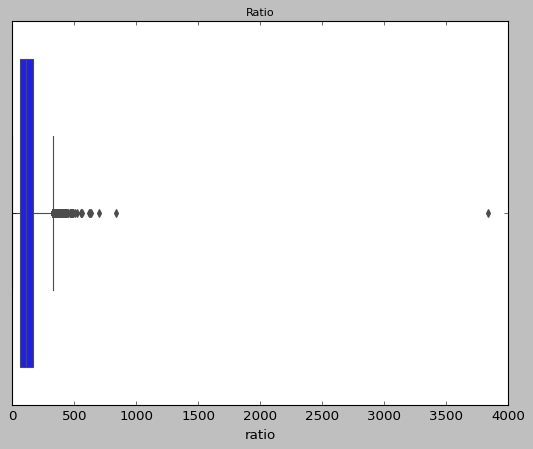

In [49]:
a = sns.boxplot(p1['ratio'] , orient='v')
a.set_title("Ratio",fontsize=10)

Text(0.5, 1.0, 'ratio')

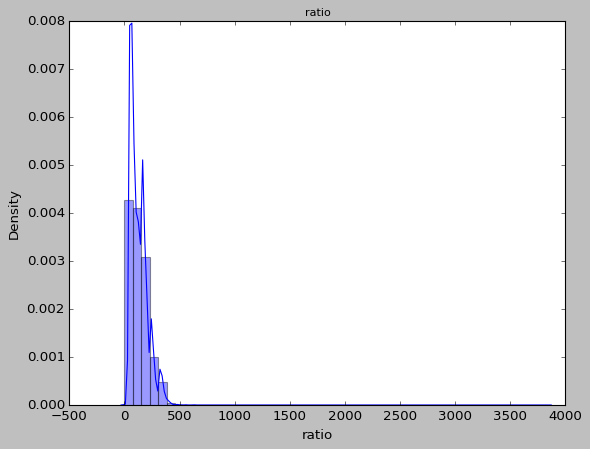

In [50]:
a = sns.distplot(p1['ratio'])
a.set_title("ratio",fontsize=10)

## Outlier treatment

In [51]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [52]:

for column in p1.columns:
    lr,ur=remove_outlier(p1[column])
    p1[column]=np.where(p1[column]>ur,ur,p1[column])
    p1[column]=np.where(p1[column]<lr,lr,p1[column])

In [53]:

for column in p2.columns:
    lr,ur=remove_outlier(p2[column])
    p2[column]=np.where(p2[column]>ur,ur,p2[column])
    p2[column]=np.where(p2[column]<lr,lr,p2[column])

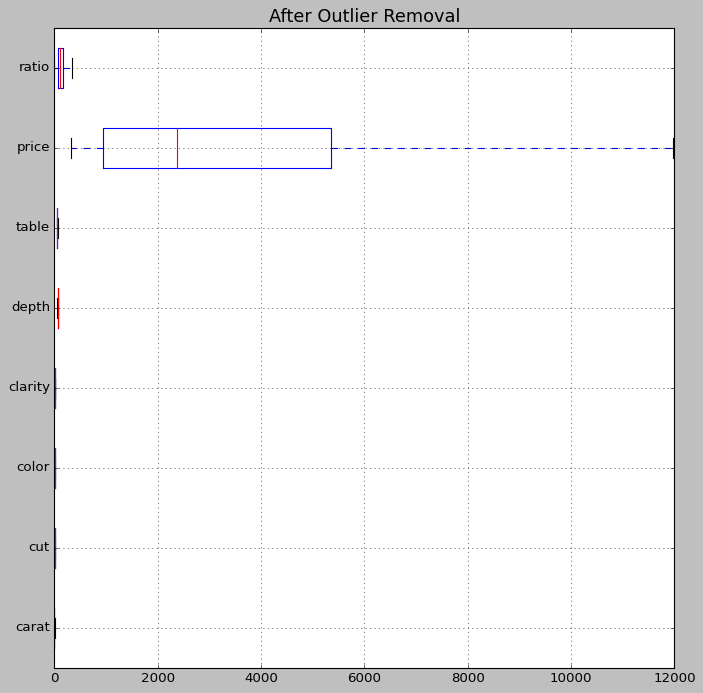

In [54]:
plt.figure(figsize=(10,10))
p1.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [55]:
p2=p2.drop("ratio", axis=1)

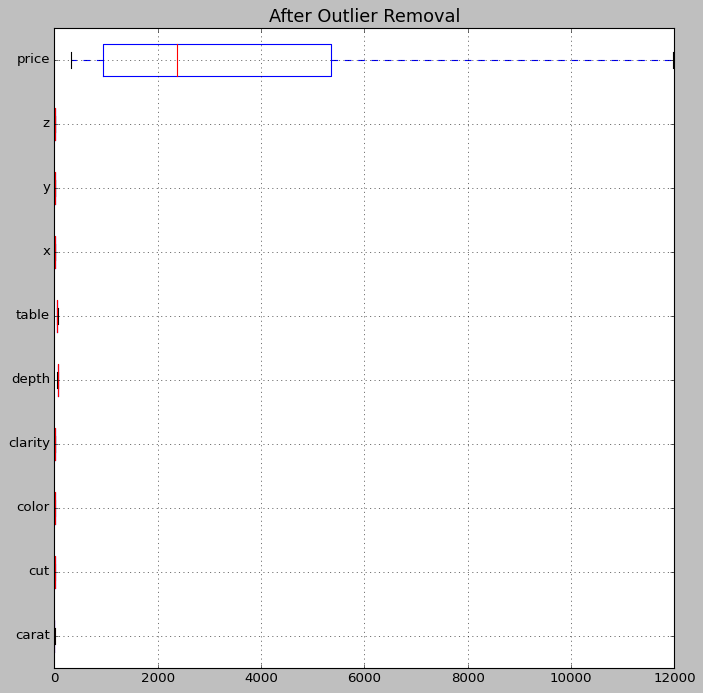

In [56]:

plt.figure(figsize=(10,10))
p2.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [57]:
p1.head()

,carat,cut,color,clarity,depth,table,price,ratio
0,0.30,4.0,5.0,4.0,62.1,58.0,499.0,48.726678
1,0.33,3.0,3.0,9.0,60.8,58.0,984.0,53.225640
2,0.90,2.0,5.0,7.0,62.2,60.0,6289.0,139.726944
3,0.42,4.0,4.0,6.0,61.6,56.0,1082.0,68.482560
4,0.31,4.0,4.0,8.0,60.4,59.0,779.0,51.066825


## Linear regression

In [58]:

# Copy all the predictor variables into X dataframe
X = p1.drop('price', axis=1)

# Copy target into the y dataframe. 
y = p1[['price']]
y

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0
...,...
26962,5408.0
26963,1114.0
26964,1656.0
26965,682.0


## Approach B

In [59]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [60]:
from scipy.stats import zscore

In [61]:
X_train  = X_train.apply(zscore)
X_test = X_test.apply(zscore)
y_train = y_train.apply(zscore)
y_test = y_test.apply(zscore)

In [62]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)


LinearRegression()

In [63]:
regression_model.intercept_[0]

-1.3578917018039007e-16

In [64]:
# Let us explore the coefficients for each of the independent attributes
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The coefficient for carat is 0.8652900551020606
The coefficient for cut is 0.032421207867434056
The coefficient for color is 0.13591400701611012
The coefficient for clarity is 0.21518910396563407
The coefficient for depth is -0.002715606052289411
The coefficient for table is -0.008137866531239034
The coefficient for ratio is 0.1923044127552714


In [65]:
# R square on training data
regression_model.score(X_train, y_train)

0.9304849541760551

In [66]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9307189557016616

In [67]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train,y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.26365706101666403

In [68]:
# concatenate X and y into a single dataframe
data_train=pd.concat([X_train,y_train],axis=1)
data_test=pd.concat([X_test,y_test],axis=1)

In [69]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'ratio', 'price'], dtype='object')

In [70]:
expr= 'price ~ carat + cut + color + clarity + depth + table + ratio'

In [71]:
import statsmodels.formula.api as smf
lml=smf.ols(formula=expr,data=data_train).fit()
lml.params

Intercept   -1.526557e-16
carat        8.652901e-01
cut          3.242121e-02
color        1.359140e-01
clarity      2.151891e-01
depth       -2.715606e-03
table       -8.137867e-03
ratio        1.923044e-01
dtype: float64

In [72]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 3.604e+04
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:33:14   Log-Likelihood:                -1618.2
No. Observations:               18853   AIC:                             3252.
Df Residuals:                   18845   BIC:                             3315.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.527e-16      0.002  -7.95e-14      1.0

## Approach A

In [73]:
# Copy all the predictor variables into X dataframe
X = p2.drop('price', axis=1)

# Copy target into the y dataframe. 
y = p2[['price']]
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,4.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,9.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,7.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,6.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,8.0,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,3.0,3.0,4.0,62.3,58.0,6.61,6.52,4.09
26963,0.33,4.0,2.0,9.0,61.9,55.0,4.44,4.42,2.74
26964,0.51,3.0,5.0,5.0,61.7,58.0,5.12,5.15,3.17
26965,0.27,2.0,4.0,7.0,61.8,56.0,4.19,4.20,2.60


In [74]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [75]:
X_train  = X_train.apply(zscore)
X_test = X_test.apply(zscore)
y_train = y_train.apply(zscore)
y_test = y_test.apply(zscore)

In [76]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [77]:
regression_model.intercept_[0]

-1.330238846955097e-16

In [78]:
# Let us explore the coefficients for each of the independent attributes
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The coefficient for carat is 1.1723220530713456
The coefficient for cut is 0.03539040436995031
The coefficient for color is 0.13666753155340558
The coefficient for clarity is 0.2095303091516586
The coefficient for depth is -0.002572687736504881
The coefficient for table is -0.007665738711258011
The coefficient for x is -0.45736812006852373
The coefficient for y is 0.40123507744912734
The coefficient for z is -0.06273378637536993


In [79]:
# R square on training data
regression_model.score(X_train, y_train)

0.9311670171538092

In [80]:
# R square on test data
regression_model.score(X_test, y_test)

0.9311987794756678

In [81]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train,y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.26236040639965247

In [82]:
# concatenate X and y into a single dataframe
data_train=pd.concat([X_train,y_train],axis=1)
data_test=pd.concat([X_test,y_test],axis=1)

In [83]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [84]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y+ z'

In [85]:
import statsmodels.formula.api as smf
lml=smf.ols(formula=expr,data=data_train).fit()
lml.params

Intercept   -1.474515e-16
carat        1.172322e+00
cut          3.539040e-02
color        1.366675e-01
clarity      2.095303e-01
depth       -2.572688e-03
table       -7.665739e-03
x           -4.573681e-01
y            4.012351e-01
z           -6.273379e-02
dtype: float64

In [86]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.832e+04
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:33:28   Log-Likelihood:                -1525.3
No. Observations:               18853   AIC:                             3071.
Df Residuals:                   18843   BIC:                             3149.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.475e-16      0.002  -7.71e-14      1.0

In [87]:
for i,j in np.array(lml.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (1.17) * carat + (0.04) * cut + (0.14) * color + (0.21) * clarity + (-0.0) * depth + (-0.01) * table + (-0.46) * x + (0.4) * y + (-0.06) * z + 

In [88]:
# Prediction on Test data
y_pred = lml.predict(data_test)

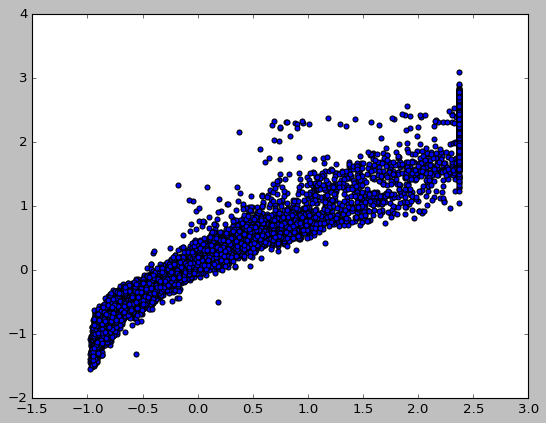

In [89]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [90]:
mse = np.mean((lml.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [91]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.2623604063996519

# Q2 Problem 2: Logistic Regression and LDA

In [4]:
q1=pd.read_csv("Holiday_Package.csv")

In [5]:
q1.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [6]:
q1.shape

(872, 8)

In [7]:
q1.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [8]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [9]:
q1.rename(columns={ q1.columns[0]: "SN" }, inplace = True)

In [10]:
q1.drop("SN",axis=1,inplace = True)

In [11]:
q1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [12]:
q1.isna().sum() 

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [13]:
q1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [14]:
q1["Holliday_Package"].value_counts(normalize= True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [15]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [16]:
q1.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [17]:
q1['hpackage'] = q1['Holliday_Package'].replace({"yes": 1, "no": 0})

In [18]:
q1.drop("Holliday_Package",axis=1,inplace=True)

In [19]:
q1.head()

,Salary,age,educ,no_young_children,no_older_children,foreign,hpackage
0,48412,30,8,1,1,no,0
1,37207,45,8,0,1,no,1
2,58022,46,9,0,0,no,0
3,66503,31,11,2,0,no,0
4,66734,44,12,0,2,no,0


In [20]:
q1.shape

(872, 7)

In [21]:
dups = q1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(q1.shape)

Number of duplicate rows = 0
(872, 7)


In [22]:
q1.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'foreign', 'hpackage'],
      dtype='object')

## Univariate analysis

Text(0.5, 1.0, 'Education')

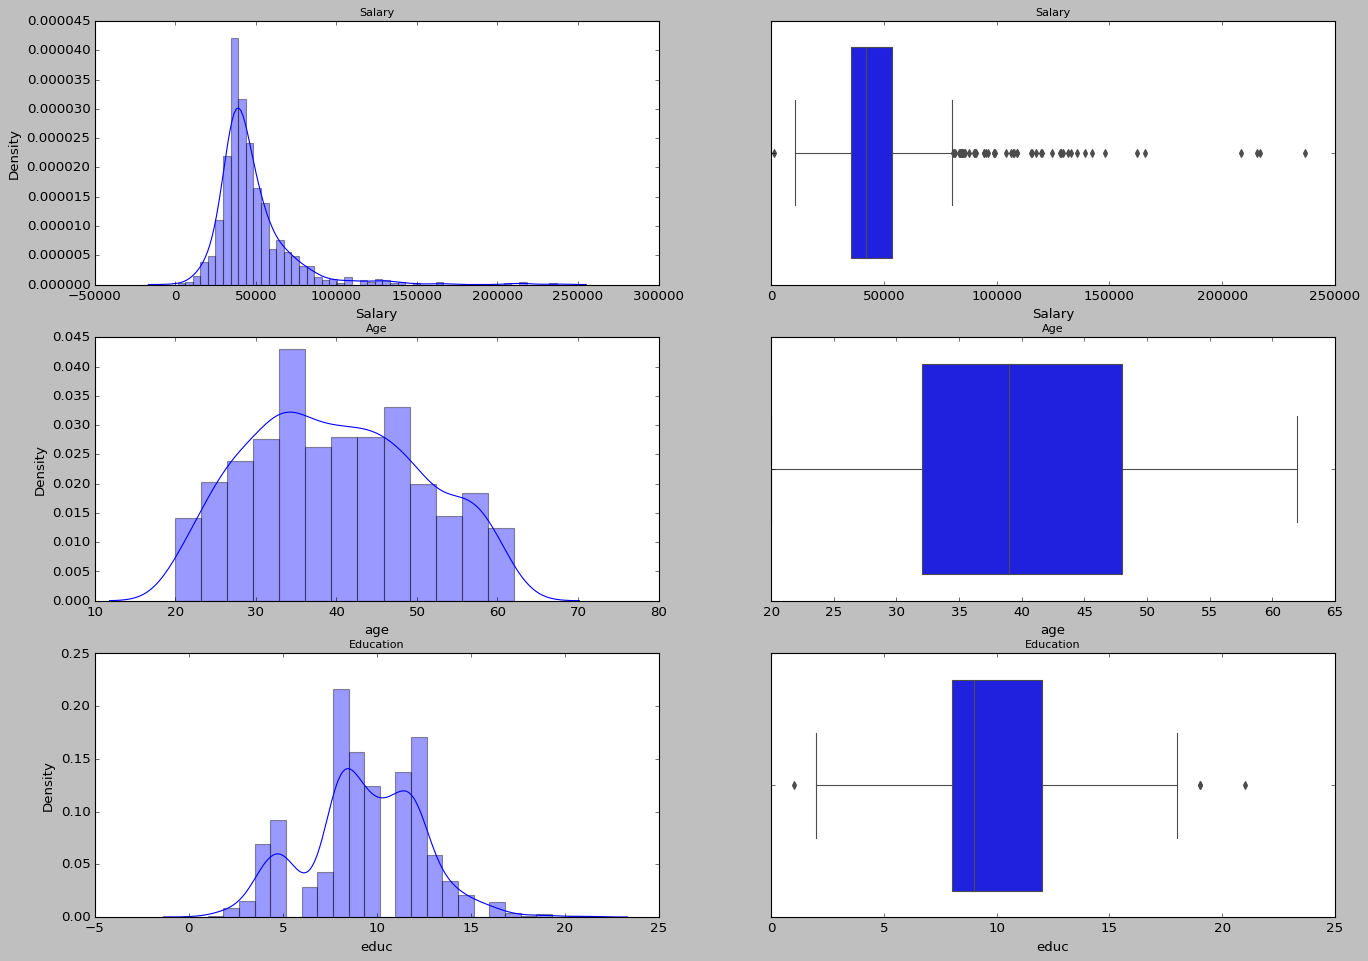

In [23]:

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 14)

a = sns.distplot(q1['Salary'] , ax=axes[0][0])
a.set_title("Salary",fontsize=10)
a = sns.boxplot(q1['Salary'] , orient='v', ax=axes[0][1])
a.set_title("Salary",fontsize=10)

a = sns.distplot(q1['age'] , ax=axes[1][0])
a.set_title("Age",fontsize=10)
a = sns.boxplot(q1['age'] , orient='v', ax=axes[1][1])
a.set_title("Age",fontsize=10)

a = sns.distplot(q1['educ'] , ax=axes[2][0])
a.set_title("Education",fontsize=10)
a = sns.boxplot(q1['educ'] , orient='v', ax=axes[2][1])
a.set_title("Education",fontsize=10)

Text(0.5, 1.0, 'No Older Children')

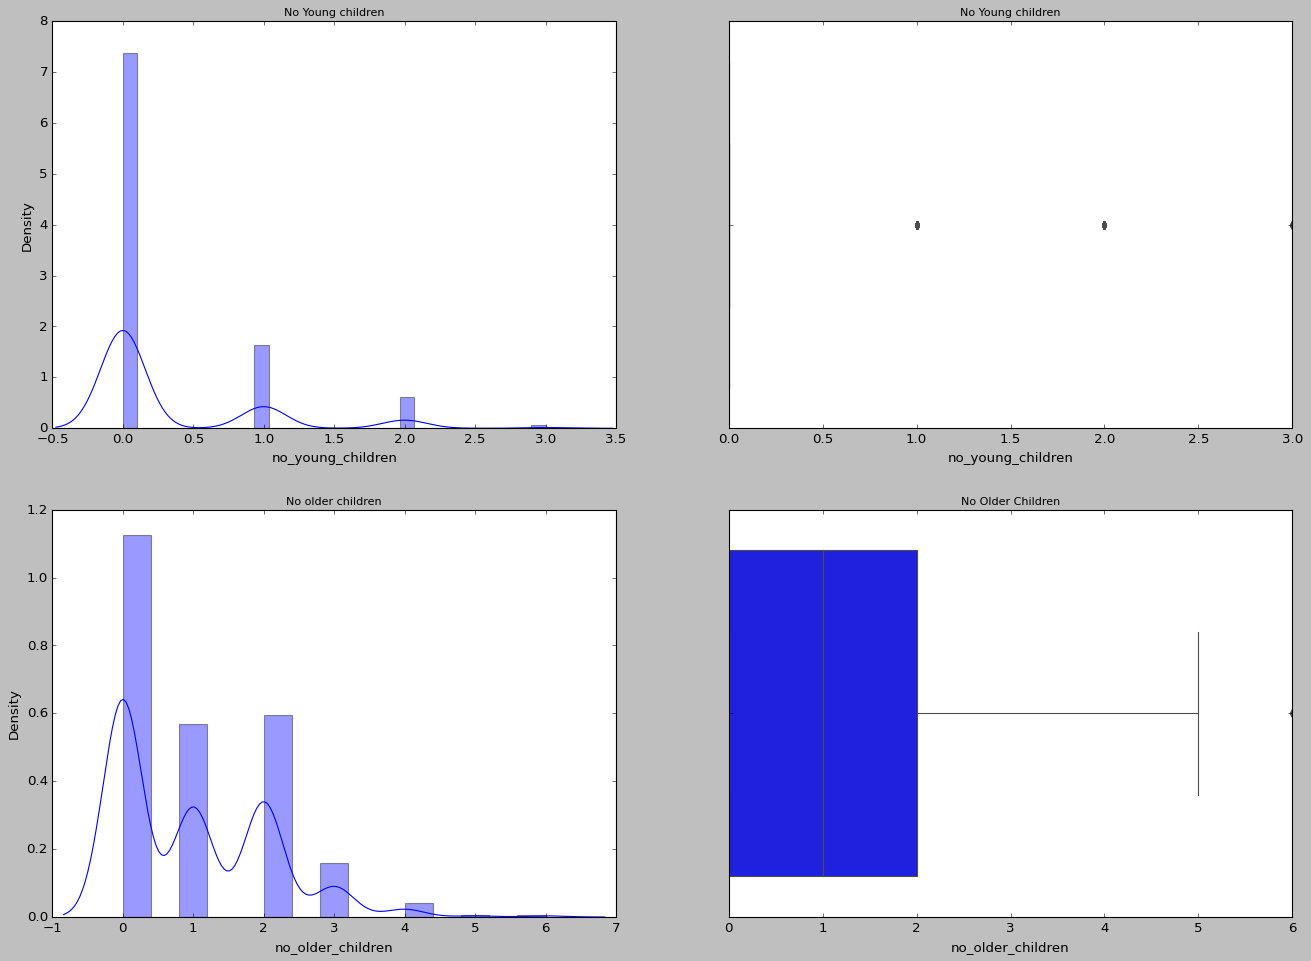

In [24]:

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 14)

a = sns.distplot(q1['no_young_children'], ax=axes[0][0])
a.set_title("No Young children",fontsize=10)
a = sns.boxplot(q1['no_young_children'] , orient='v', ax=axes[0][1])
a.set_title("No Young children",fontsize=10)


a = sns.distplot(q1['no_older_children'] , ax=axes[1][0])
a.set_title("No older children",fontsize=10)
a = sns.boxplot(q1['no_older_children'] , orient='v', ax=axes[1][1])
a.set_title("No Older Children",fontsize=10)


In [25]:
q1.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
hpackage             0.161348
dtype: float64

## Bi variate and multivariate analysis

Text(0, 0.5, 'Holiday package')

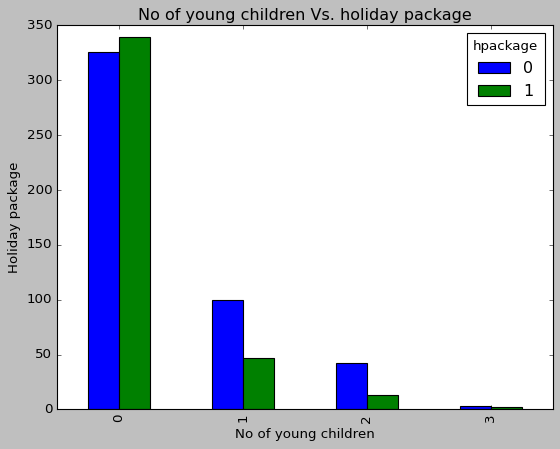

In [26]:
pd.crosstab(q1.no_young_children,q1.hpackage).plot(kind='bar')
plt.title('No of young children Vs. holiday package')
plt.xlabel('No of young children')
plt.ylabel('Holiday package')

Text(0, 0.5, 'Holiday package')

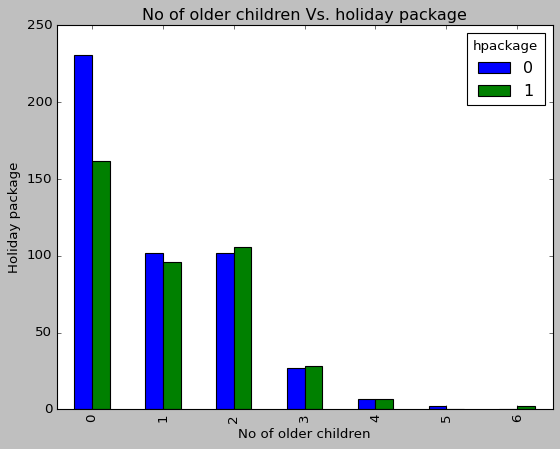

In [27]:
pd.crosstab(q1.no_older_children,q1.hpackage).plot(kind='bar')
plt.title('No of older children Vs. holiday package')
plt.xlabel('No of older children')
plt.ylabel('Holiday package')

Text(0, 0.5, 'Holiday package')

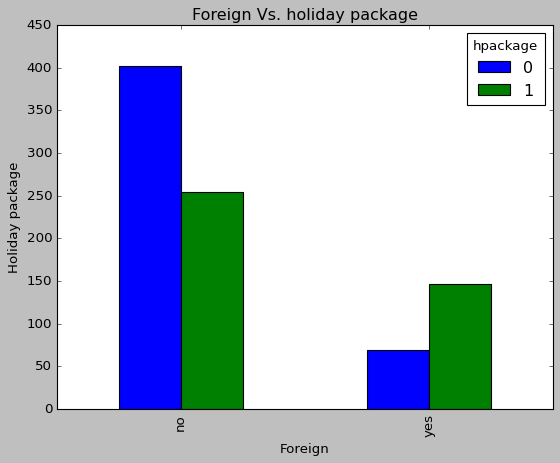

In [28]:
pd.crosstab(q1.foreign,q1.hpackage).plot(kind='bar')
plt.title('Foreign Vs. holiday package')
plt.xlabel('Foreign')
plt.ylabel('Holiday package')

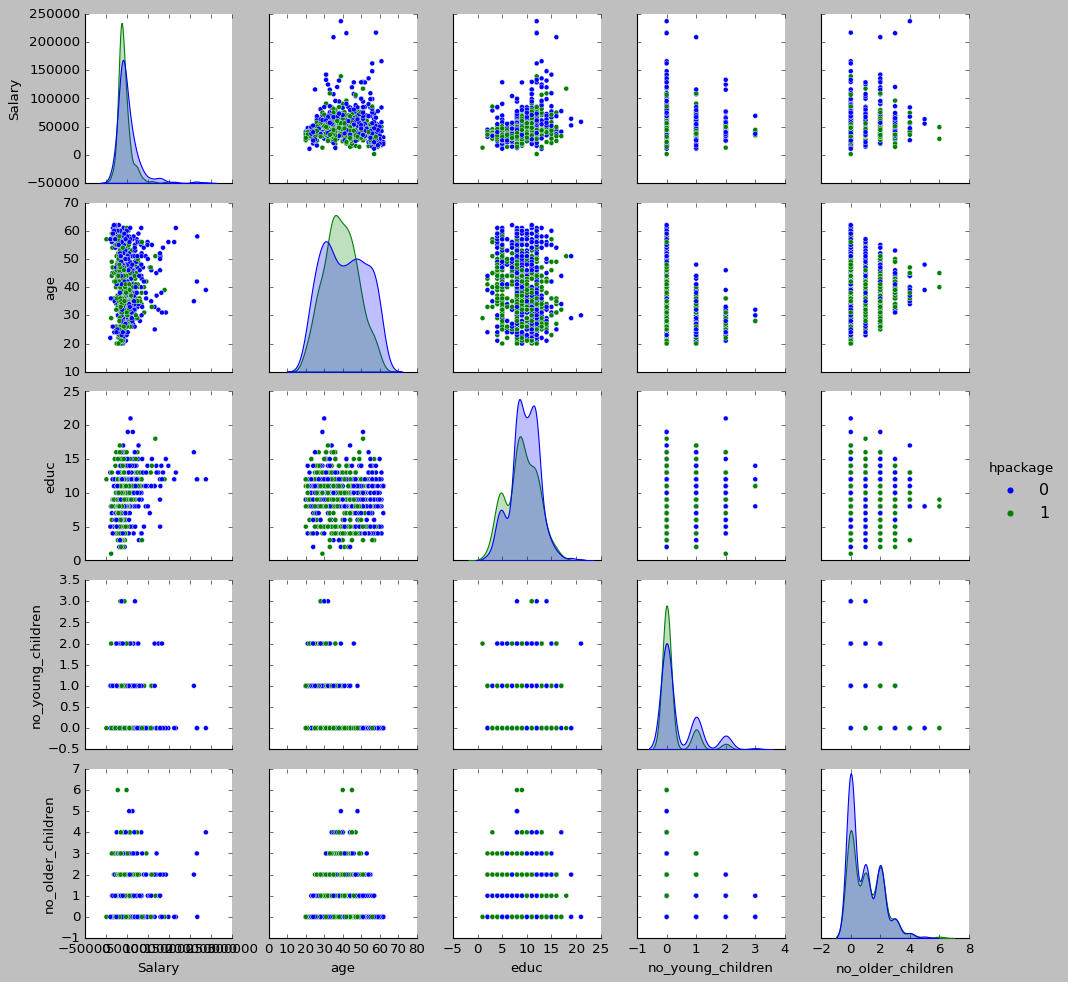

In [29]:
sns.pairplot(q1 , hue='hpackage' , diag_kind = 'kde')

In [30]:
q1.corr()

,Salary,age,educ,no_young_children,no_older_children,hpackage
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772,-0.185694
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205,-0.092311
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321,-0.102552
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428,-0.173115
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000,0.080286
hpackage,-0.185694,-0.092311,-0.102552,-0.173115,0.080286,1.000000


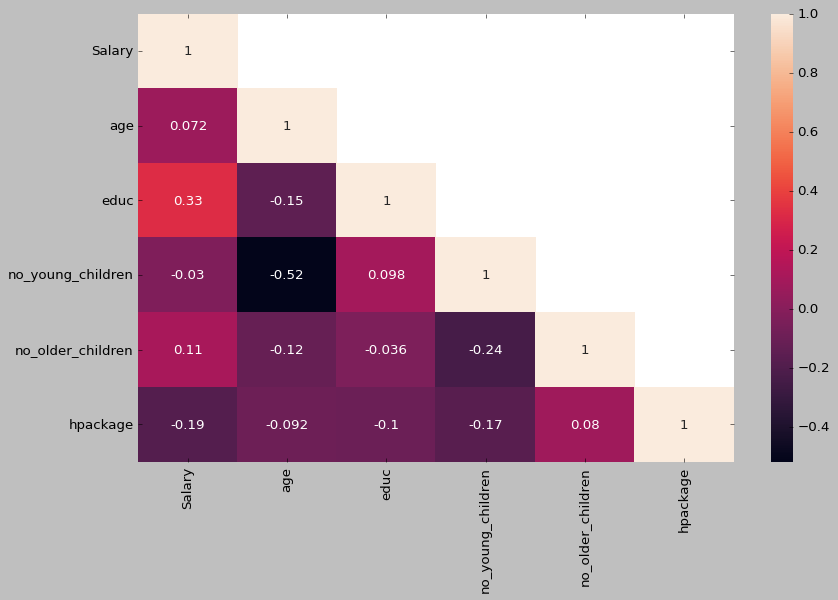

In [31]:
plt.figure(figsize=(12,7))
sns.heatmap(q1.corr(), annot=True,mask=np.triu(q1.corr(),+1));

In [32]:
q1["no_young_children"].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [33]:
q1["no_young_children"].replace({0: "No younger ", 1: "one younger", 2: "two younger", 3: "Three younger"})

0      one younger
1      No younger 
2      No younger 
3      two younger
4      No younger 
          ...     
867    two younger
868    No younger 
869    two younger
870    No younger 
871    No younger 
Name: no_young_children, Length: 872, dtype: object

In [34]:
q1 = pd.get_dummies(q1, columns=['no_young_children'])

In [35]:
q1["no_older_children"].value_counts()

0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64

In [36]:
q1["no_older_children"].replace({0: "No older children ", 1: "one older", 2: "two older", 3: "Three older", 4: "Four older", 5 : "five older"})

0               one older
1               one older
2      No older children 
3      No older children 
4               two older
              ...        
867             one older
868    No older children 
869    No older children 
870             one older
871    No older children 
Name: no_older_children, Length: 872, dtype: object

In [37]:
q1 = pd.get_dummies(q1, columns=['no_older_children'])

In [38]:
q1["foreign"].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [39]:
q1 = pd.get_dummies(q1, columns=['foreign'])

In [40]:
q1.head()

,Salary,age,educ,hpackage,no_young_children_0,no_young_children_1,no_young_children_2,no_young_children_3,no_older_children_0,no_older_children_1,no_older_children_2,no_older_children_3,no_older_children_4,no_older_children_5,no_older_children_6,foreign_no,foreign_yes
0,48412,30,8,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,37207,45,8,1,1,0,0,0,0,1,0,0,0,0,0,1,0
2,58022,46,9,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,66503,31,11,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,66734,44,12,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [41]:
q1.columns

Index(['Salary', 'age', 'educ', 'hpackage', 'no_young_children_0',
       'no_young_children_1', 'no_young_children_2', 'no_young_children_3',
       'no_older_children_0', 'no_older_children_1', 'no_older_children_2',
       'no_older_children_3', 'no_older_children_4', 'no_older_children_5',
       'no_older_children_6', 'foreign_no', 'foreign_yes'],
      dtype='object')

In [42]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Salary               872 non-null    int64
 1   age                  872 non-null    int64
 2   educ                 872 non-null    int64
 3   hpackage             872 non-null    int64
 4   no_young_children_0  872 non-null    uint8
 5   no_young_children_1  872 non-null    uint8
 6   no_young_children_2  872 non-null    uint8
 7   no_young_children_3  872 non-null    uint8
 8   no_older_children_0  872 non-null    uint8
 9   no_older_children_1  872 non-null    uint8
 10  no_older_children_2  872 non-null    uint8
 11  no_older_children_3  872 non-null    uint8
 12  no_older_children_4  872 non-null    uint8
 13  no_older_children_5  872 non-null    uint8
 14  no_older_children_6  872 non-null    uint8
 15  foreign_no           872 non-null    uint8
 16  foreign_yes          872 n

In [43]:
#Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler()

In [44]:
Q1 = q1["Salary"].quantile(0.25)
Q3 = q1["Salary"].quantile(0.75)
IQR = Q3 - Q1
q22=((pd.DataFrame((q1["Salary"] < (Q1 - 1.5 * IQR)) | (q1["Salary"] > (Q3 + 1.5 * IQR))).sum())/872)*100
q22

Salary    6.536697
dtype: float64

In [45]:
q2=q1

## Treat outliers

In [46]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [47]:
for column in q2.columns:
    lr,ur=remove_outlier(q2[column])
    q2[column]=np.where(q2[column]>ur,ur,q2[column])
    q2[column]=np.where(q2[column]<lr,lr,q2[column])

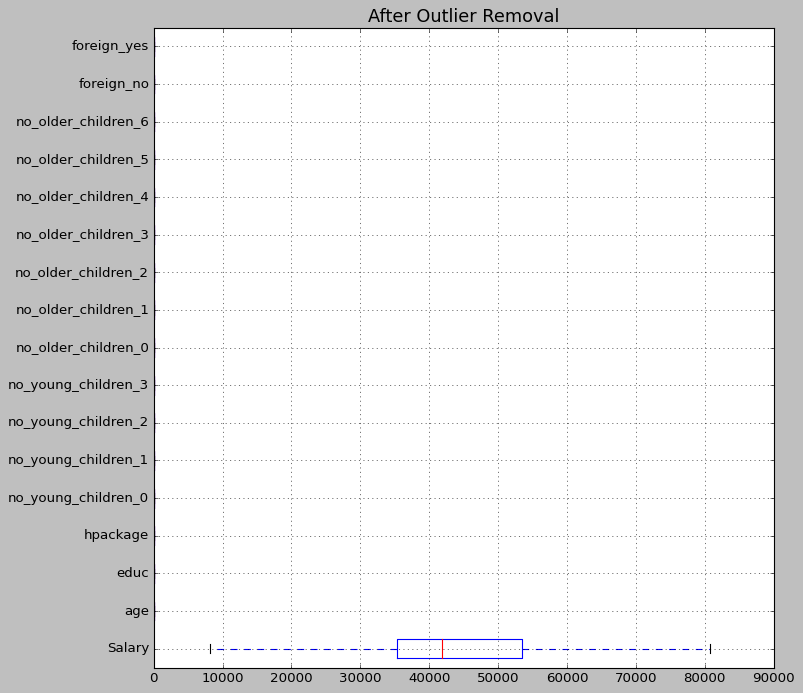

In [48]:

plt.figure(figsize=(10,10))
q2.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [49]:
q2.head()

,Salary,age,educ,hpackage,no_young_children_0,no_young_children_1,no_young_children_2,no_young_children_3,no_older_children_0,no_older_children_1,no_older_children_2,no_older_children_3,no_older_children_4,no_older_children_5,no_older_children_6,foreign_no,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,37207.0,45.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,58022.0,46.0,9.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,66503.0,31.0,11.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,66734.0,44.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
# Copy all the predictor variables into X dataframe 
#with outliers
Xo = q2.drop('hpackage', axis=1)

# Copy target into the y dataframe. 
yo = q2['hpackage']

In [51]:
# Copy all the predictor variables into X dataframe
X = q1.drop('hpackage', axis=1)

# Copy target into the y dataframe. 
y = q1['hpackage']

In [52]:
X

,Salary,age,educ,no_young_children_0,no_young_children_1,no_young_children_2,no_young_children_3,no_older_children_0,no_older_children_1,no_older_children_2,no_older_children_3,no_older_children_4,no_older_children_5,no_older_children_6,foreign_no,foreign_yes
0,48412.0,30.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,37207.0,45.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,58022.0,46.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,66503.0,31.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,66734.0,44.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,40030.0,24.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
868,32137.0,48.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
869,25178.0,24.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
870,55958.0,41.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
y

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
867    0.0
868    1.0
869    0.0
870    1.0
871    0.0
Name: hpackage, Length: 872, dtype: float64

## with outlier treatment and without outlier treatment

In [54]:
# Split X and y into training and test set in 70:30 ratio for outlier treated dataset
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.30 , random_state=1,stratify=y)

In [55]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [56]:
# Fit the Logistic Regression model for outlier treated dataset
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='l2',verbose=True,n_jobs=2)
model.fit(Xo_train, yo_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg', verbose=True)

In [57]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='l2',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg', verbose=True)

In [58]:
#for outlier treated dataset
yotrain_predict = model.predict(Xo_train)
yotest_predict = model.predict(Xo_test)

In [59]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [60]:
#for outlier treated dataset
yotest_predict_prob=model.predict_proba(Xo_test)
pd.DataFrame(yotest_predict_prob).head()

,0,1
0,0.576580,0.423420
1,0.487989,0.512011
2,0.593825,0.406175
3,0.400950,0.599050
4,0.532146,0.467854


In [61]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sort()

,0,1
0,0.576580,0.423420
1,0.487989,0.512011
2,0.593825,0.406175
3,0.400950,0.599050
4,0.532146,0.467854


In [62]:
# Accuracy - Training Data for outlier treated dataset
model.score(Xo_train, yo_train)

0.6032786885245902

In [63]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6032786885245902

AUC: 0.630


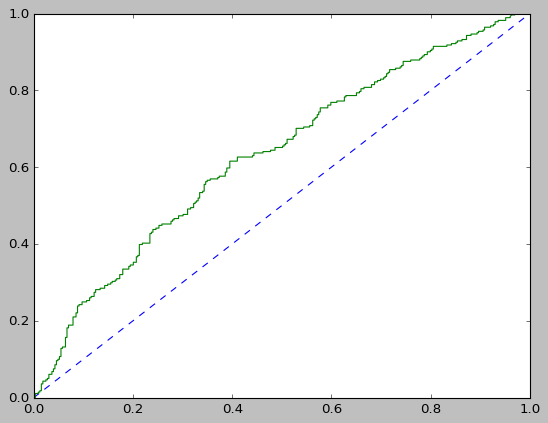

In [64]:
# predict probabilities for outlier treated dataset
probso = model.predict_proba(Xo_train)
# keep probabilities for the positive outcome only
probso = probso[:, 1]
# calculate AUC
auc = roc_auc_score(yo_train, probso)
print('AUC: %.3f' % auc)
# calculate roc curve
traino_fpr, traino_tpr, traino_thresholds = roc_curve(yo_train, probso)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(traino_fpr, traino_tpr);

AUC: 0.630


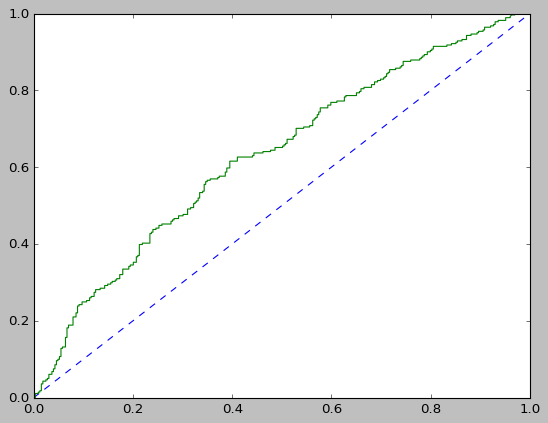

In [65]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [66]:
# Accuracy - Test Data for outlier treated dataset
model.score(Xo_test, yo_test)

0.5534351145038168

In [67]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.5534351145038168

AUC: 0.630


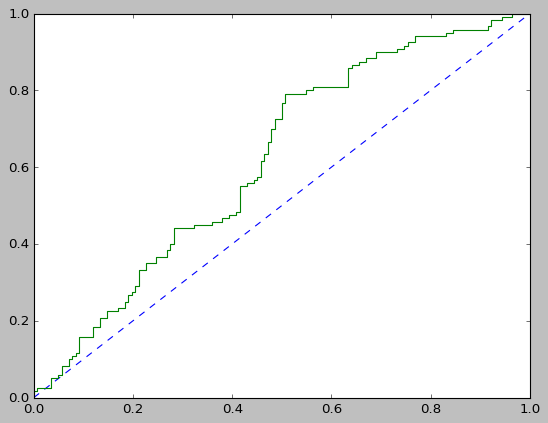

In [68]:
# predict probabilities for outlier treated dataset
probs = model.predict_proba(Xo_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(yo_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
testo_fpr, testo_tpr, testo_thresholds = roc_curve(yo_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(testo_fpr, testo_tpr);

AUC: 0.630


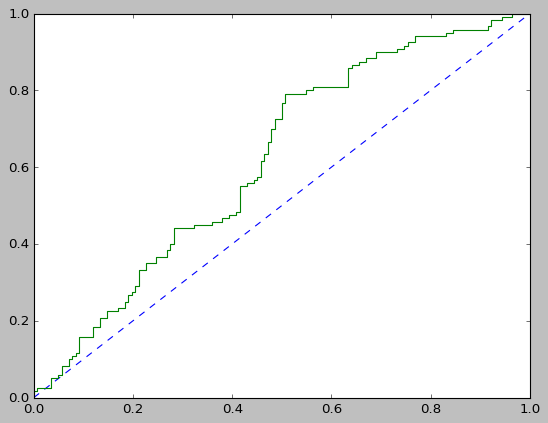

In [69]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [70]:
confusion_matrix(yo_train, yotrain_predict) #for outlier treated dataset

array([[219, 110],
       [132, 149]], dtype=int64)

In [71]:
confusion_matrix(y_train, ytrain_predict)

array([[219, 110],
       [132, 149]], dtype=int64)

In [72]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.62      0.67      0.64       329
         1.0       0.58      0.53      0.55       281

    accuracy                           0.60       610
   macro avg       0.60      0.60      0.60       610
weighted avg       0.60      0.60      0.60       610



In [73]:
confusion_matrix(yo_test, yotest_predict) #for outlier treated dataset

array([[91, 51],
       [66, 54]], dtype=int64)

In [74]:
confusion_matrix(y_test, ytest_predict)

array([[91, 51],
       [66, 54]], dtype=int64)

In [75]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.58      0.64      0.61       142
         1.0       0.51      0.45      0.48       120

    accuracy                           0.55       262
   macro avg       0.55      0.55      0.54       262
weighted avg       0.55      0.55      0.55       262



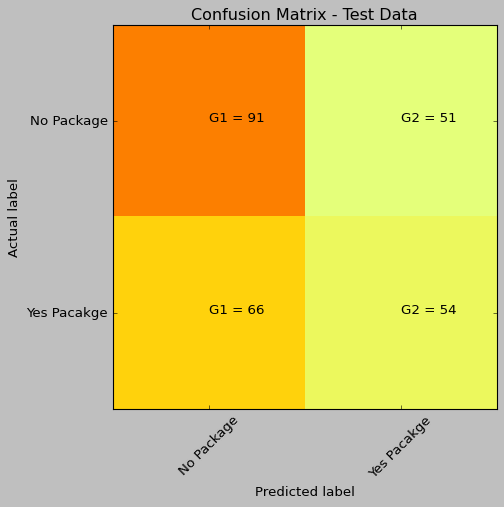

In [76]:
cm = metrics.confusion_matrix(y_test, ytest_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No Package', 'Yes Pacakge']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Hypertuning

In [77]:
grid={'penalty':['l2','none'],
      'solver':['saga','lbfgs'],
      'tol':[0.0001,0.00001]}

In [78]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [79]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [80]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['saga', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [81]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='saga')


In [82]:
best_model = grid_search.best_estimator_

In [83]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [84]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.528833,0.471167
1,0.554530,0.445470
2,0.533468,0.466532
3,0.546548,0.453452
4,0.568762,0.431238


In [85]:
## Confusion matrix on the training data

# plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       329
         1.0       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610
 



In [86]:
## Confusion matrix on the test data

# plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       142
         1.0       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262
 



## LDA

In [87]:
X

,Salary,age,educ,no_young_children_0,no_young_children_1,no_young_children_2,no_young_children_3,no_older_children_0,no_older_children_1,no_older_children_2,no_older_children_3,no_older_children_4,no_older_children_5,no_older_children_6,foreign_no,foreign_yes
0,48412.0,30.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,37207.0,45.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,58022.0,46.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,66503.0,31.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,66734.0,44.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,40030.0,24.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
868,32137.0,48.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
869,25178.0,24.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
870,55958.0,41.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [88]:
y

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
867    0.0
868    1.0
869    0.0
870    1.0
871    0.0
Name: hpackage, Length: 872, dtype: float64

In [89]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [90]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

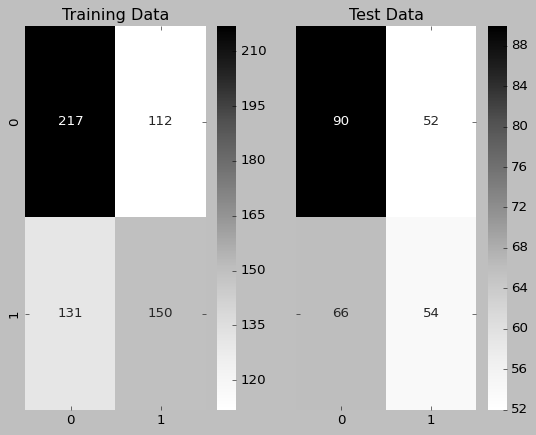

In [91]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [92]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.62      0.66      0.64       329
         1.0       0.57      0.53      0.55       281

    accuracy                           0.60       610
   macro avg       0.60      0.60      0.60       610
weighted avg       0.60      0.60      0.60       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.58      0.63      0.60       142
         1.0       0.51      0.45      0.48       120

    accuracy                           0.55       262
   macro avg       0.54      0.54      0.54       262
weighted avg       0.55      0.55      0.55       262
 



In [93]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.631
AUC for the Test Data: 0.620


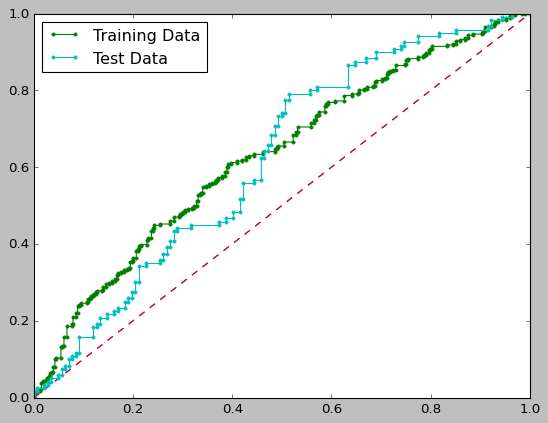

In [94]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Choosing a cutoff for probablities

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


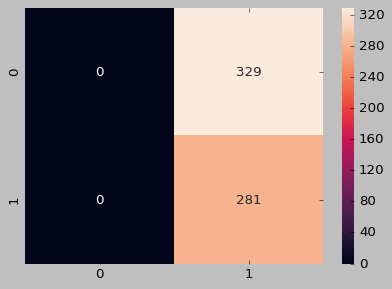

0.2 

Accuracy Score 0.4754
F1 Score 0.6372 

Confusion Matrix


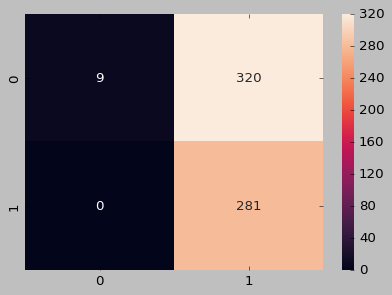

0.3 

Accuracy Score 0.4934
F1 Score 0.6326 

Confusion Matrix


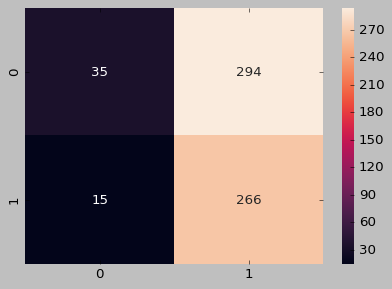

0.4 

Accuracy Score 0.5557
F1 Score 0.621 

Confusion Matrix


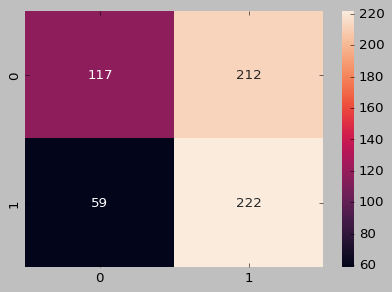

0.5 

Accuracy Score 0.6016
F1 Score 0.5525 

Confusion Matrix


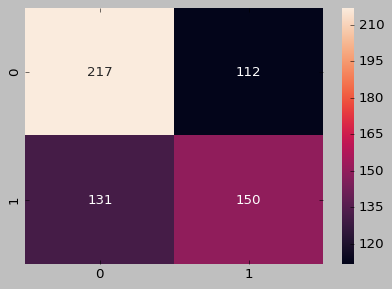

0.6 

Accuracy Score 0.5639
F1 Score 0.1988 

Confusion Matrix


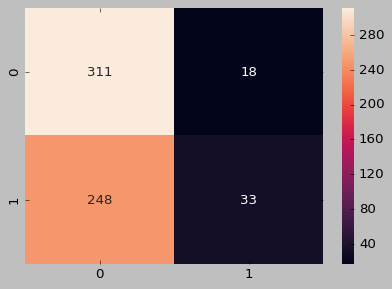

0.7 

Accuracy Score 0.5377
F1 Score 0.0 

Confusion Matrix


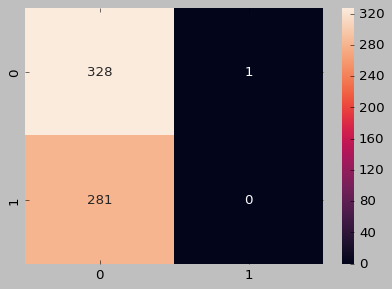

0.8 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


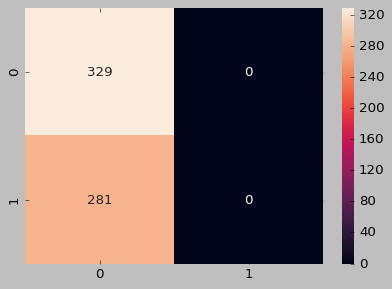

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


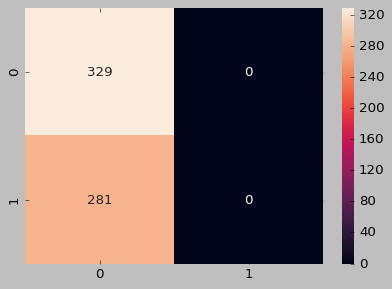

In [95]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the train data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [101]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [102]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

         0.0       0.58      0.63      0.60       142
         1.0       0.51      0.45      0.48       120

    accuracy                           0.55       262
   macro avg       0.54      0.54      0.54       262
weighted avg       0.55      0.55      0.55       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

         0.0       0.69      0.37      0.48       142
         1.0       0.52      0.81      0.63       120

    accuracy                           0.57       262
   macro avg       0.61      0.59      0.56       262
weighted avg       0.61      0.57      0.55       262
 

